In [1]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

#### Loding Data

In [ ]:
df_flights = pd.read_csv('df_flights.csv')
df_flights = df_flights.drop(columns=('Unnamed: 0'))

In [ ]:
df_flights.head(15)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-07-29,DL,DL,DL,2607,DL,N3743H,2607,10397,ATL,"Atlanta, GA",15304,TPA,"Tampa, FL",830,828.0,-2.0,21.0,849.0,952.0,3.0,957,955.0,-2.0,0.0,NaN,0.0,N,87.0,87.0,63.0,1.0,406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-06-27,DL,DL,DL,881,DL,N373DX,881,10397,ATL,"Atlanta, GA",10423,AUS,"Austin, TX",1334,1337.0,3.0,12.0,1349.0,1437.0,8.0,1452,1445.0,-7.0,0.0,NaN,0.0,N,138.0,128.0,108.0,1.0,813.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-31,HA,HA,HA,360,HA,N478HA,360,13830,OGG,"Kahului, HI",12402,ITO,"Hilo, HI",1721,1720.0,-1.0,7.0,1727.0,1751.0,6.0,1800,1757.0,-3.0,0.0,NaN,0.0,N,39.0,37.0,24.0,1.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-05-14,G4,G4,G4,2953,G4,241NV,2953,11618,EWR,"Newark, NJ",15412,TYS,"Knoxville, TN",1100,1049.0,-11.0,34.0,1123.0,1256.0,7.0,1300,1303.0,3.0,0.0,NaN,0.0,N,120.0,134.0,93.0,1.0,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-08-07,DL,DL,DL,2192,DL,N815DN,2192,15304,TPA,"Tampa, FL",11433,DTW,"Detroit, MI",623,619.0,-4.0,11.0,630.0,838.0,6.0,900,844.0,-16.0,0.0,NaN,0.0,N,157.0,145.0,128.0,1.0,983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-12-15,F9,F9,F9,2963,F9,N339FR,2963,11618,EWR,"Newark, NJ",14027,PBI,"West Palm Beach/Palm Beach, FL",544,601.0,17.0,46.0,647.0,908.0,8.0,845,916.0,31.0,0.0,NaN,0.0,N,181.0,195.0,141.0,1.0,1023.0,17.0,0.0,14.0,0.0,0.0,NaN,NaN,NaN,NaN
6,2018-11-17,AA,AA_CODESHARE,AA,4479,YX,N130HQ,4479,10693,BNA,"Nashville, TN",11057,CLT,"Charlotte, NC",1441,1439.0,-2.0,12.0,1451.0,1647.0,8.0,1725,1655.0,-30.0,0.0,NaN,0.0,N,104.0,76.0,56.0,1.0,328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-12-28,UA,UA,UA,719,UA,N38459,719,12264,IAD,"Washington, DC",12892,LAX,"Los Angeles, CA",1720,1711.0,-9.0,15.0,1726.0,1924.0,7.0,2006,1931.0,-35.0,0.0,NaN,0.0,N,346.0,320.0,298.0,1.0,2288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-03-06,WN,WN,WN,863,WN,N7841A,863,10693,BNA,"Nashville, TN",10397,ATL,"Atlanta, GA",1300,1257.0,-3.0,10.0,1307.0,1445.0,6.0,1505,1451.0,-14.0,0.0,NaN,0.0,N,65.0,54.0,38.0,1.0,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-07-30,UA,UA,UA,1973,UA,N26232,1973,12953,LGA,"New York, NY",12266,IAH,"Houston, TX",1015,1007.0,-8.0,28.0,1035.0,1242.0,7.0,1252,1249.0,-3.0,0.0,NaN,0.0,N,217.0,222.0,187.0,1.0,1416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_fuel_consumption = pd.read_csv('df_fuel_consumption.csv')
df_fuel_consumption = df_fuel_consumption.drop(columns=('Unnamed: 0'))

FileNotFoundError: ignored

In [ ]:
df_passengers = pd.read_csv('df_passengers.csv')
df_passengers = df_passengers.drop(columns=('Unnamed: 0'))

In [ ]:
df_passengers.head(5)

#### Correlation between columns

In [ ]:
from scipy.signal import correlate
corr_matrix = df_flights.corr()

In [ ]:
corr_matrix 

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
mkt_carrier_fl_num,1.000000,0.999934,-0.026674,-0.030410,0.005206,0.009589,0.019864,0.089651,0.017650,0.014250,0.000007,0.013510,0.018463,0.029199,0.034610,0.005326,-0.334726,-0.328133,-0.350312,NaN,-0.363846,0.025178,0.024468,-0.006699,-0.010658,0.065047,-0.000753,0.082173,0.077208,NaN
op_carrier_fl_num,0.999934,1.000000,-0.026653,-0.030487,0.005235,0.009650,0.020090,0.089709,0.017714,0.014313,-0.000003,0.013542,0.018524,0.029421,0.034619,0.005329,-0.334694,-0.328097,-0.350282,NaN,-0.363819,0.025873,0.024446,-0.006745,-0.010663,0.064963,-0.000753,0.082173,0.077208,NaN
origin_airport_id,-0.026674,-0.026653,1.000000,0.017599,-0.028046,-0.026401,-0.017208,-0.010224,-0.028564,0.000549,0.023100,-0.003223,0.002280,-0.015103,-0.002907,0.002408,0.050250,0.052927,0.053917,NaN,0.071537,-0.036300,-0.008931,0.004452,0.013068,0.002522,0.042714,-0.001054,0.005499,NaN
dest_airport_id,-0.030410,-0.030487,0.017599,1.000000,0.030666,0.032466,-0.008748,0.007495,0.031472,0.019015,-0.051674,0.018932,0.016531,-0.007293,-0.007562,-0.007481,0.082169,0.083743,0.089330,NaN,0.071995,-0.016261,-0.021173,-0.000606,0.022862,-0.027675,-0.009140,-0.102241,-0.097238,NaN
crs_dep_time,0.005206,0.005235,-0.028046,0.030666,1.000000,0.959623,0.097337,-0.003269,0.936369,0.647242,-0.054917,0.701882,0.615732,0.089835,0.013729,-0.006804,-0.024184,-0.026592,-0.022062,NaN,-0.015432,-0.058483,-0.002884,-0.039002,-0.012119,0.113942,0.969763,0.061690,0.092008,NaN
dep_time,0.009589,0.009650,-0.026401,0.032466,0.959623,1.000000,0.133534,0.007106,0.974185,0.670894,-0.050752,0.701027,0.638204,0.126137,0.005761,-0.004787,-0.028505,-0.029623,-0.027016,NaN,-0.022078,-0.046803,-0.018909,-0.028272,-0.005291,0.130734,0.686182,0.068388,0.059941,NaN
dep_delay,0.019864,0.020090,-0.017208,-0.008748,0.097337,0.133534,1.000000,0.060361,0.127009,0.038362,0.001488,0.087514,0.029700,0.962092,0.019254,0.015855,0.005606,0.008648,0.000325,NaN,-0.001223,0.623964,0.310445,0.176175,0.013580,0.541139,0.076854,0.289002,0.256774,NaN
taxi_out,0.089651,0.089709,-0.010224,0.007495,-0.003269,0.007106,0.060361,1.000000,0.036623,0.025711,0.017412,0.017308,0.021946,0.214366,0.014423,0.021109,0.075895,0.184548,0.046448,NaN,0.029473,-0.075993,0.022662,0.298367,-0.007677,-0.125399,-0.049360,0.211762,0.235819,NaN
wheels_off,0.017650,0.017714,-0.028564,0.031472,0.936369,0.974185,0.127009,0.036623,1.000000,0.689601,-0.048132,0.710379,0.656612,0.125181,0.000629,-0.003627,-0.036442,-0.033893,-0.035759,NaN,-0.033672,-0.053020,-0.019680,-0.009096,-0.004201,0.105441,0.642710,0.050662,0.038600,NaN
wheels_on,0.014250,0.014313,0.000549,0.019015,0.647242,0.670894,0.038362,0.025711,0.689601,1.000000,-0.015364,0.855236,0.962482,0.040600,NaN,0.007874,0.012094,0.014371,0.012526,NaN,0.008693,-0.056493,-0.018035,0.013611,0.003265,-0.022844,0.165082,0.055672,0.057280,NaN


#### Drop columns

In [ ]:
df_flights = df_flights.drop(columns=['op_carrier_fl_num','op_carrier_fl_num','crs_arr_time','wheels_off',
                                            'wheels_on','wheels_off','wheels_off','flights','longest_add_gtime'])

In [ ]:
df_flights['fl_date'] = pd.to_datetime(df_flights['fl_date'])

In [ ]:
df_flights = df_flights.drop(columns=['branded_code_share', 'mkt_carrier','op_unique_carrier','tail_num','cancellation_code','dup','no_name'])


In [ ]:
df_flights['origin_state']= df_flights['origin_city_name'].str[-2:]
df_flights['dest_state']= df_flights['dest_city_name'].str[-2:]

In [ ]:
df_flights['origin_state']= df_flights['origin_city_name'].str[-2:]
df_flights['dest_state']= df_flights['dest_city_name'].str[-2:]
df_flights= df_flights.replace({"origin_state" : {'IL': 1 ,'IN':1,'KY':1,'MO':1,'OH':1,'TN':1,'WV':1,
                                       'IA':2, 'MI':2, 'MN':2, 'WI':2,
                                       'CT': 3, 'DE':3, 'ME':3, 'MD':3, 'MA':3, 'NH':3, 'NJ':3, 'NY':3, 'PA':3, 'RI':3, 'VT':3,
                                       'ID': 4, 'OR':4, 'WA':4, 
                                       'AR':5, 'KS':5, 'LA':5, 'MS':5, 'OK':5, 'TX':5,
                                       'AL':6, 'FL':6, 'GA':6, 'NC':6, 'SC':6, 'VA':6,'DC':6,
                                       'AZ' :7, 'CO':7, 'NM':7, 'UT':7,
                                       'CA':8, 'NV':8,
                                       'MT':9, 'NE':9, 'ND':9, 'SD':9, 'WY':9,
                                       'HI':0, 'PR':0, 'AK':0, 'VI':0, 'TT':0}})



In [ ]:


df_flights= df_flights.replace({"dest_state" : {'IL': 1 ,'IN':1,'KY':1,'MO':1,'OH':1,'TN':1,'WV':1,
                                       'IA':2, 'MI':2, 'MN':2, 'WI':2,
                                       'CT': 3, 'DE':3, 'ME':3, 'MD':3, 'MA':3, 'NH':3, 'NJ':3, 'NY':3, 'PA':3, 'RI':3, 'VT':3,
                                       'ID': 4, 'OR':4, 'WA':4, 
                                       'AR':5, 'KS':5, 'LA':5, 'MS':5, 'OK':5, 'TX':5,
                                       'AL':6, 'FL':6, 'GA':6, 'NC':6, 'SC':6, 'VA':6,'DC':6,
                                       'AZ' :7, 'CO':7, 'NM':7, 'UT':7,
                                       'CA':8, 'NV':8,
                                       'MT':9, 'NE':9, 'ND':9, 'SD':9, 'WY':9,
                                       'HI':0, 'PR':0, 'AK':0, 'VI':0, 'TT':0}})

In [ ]:
df_flights['dest_state'].unique()

array([6, 5, 0, 1, 2, 8, 4, 3, 7, 9])

In [ ]:
df_flights = df_flights.drop(columns=['origin','origin_city_name','dest','dest_city_name'])

In [ ]:
df_flights['mkt_unique_carrier'].unique()

array(['DL', 'HA', 'G4', 'F9', 'AA', 'UA', 'WN', 'NK', 'B6', 'AS', 'VX'],
      dtype=object)

In [ ]:
df_flights= df_flights.replace({"mkt_unique_carrier" : {'DL': 1 ,'HA':2,'G4':3,'F9':4,'AA':5,'UA':6,'WN':7,
                                       'NK':8, 'B6':9, 'AS':10, 'VX':11,}})

In [ ]:
df_flights = df_flights.drop(columns=['total_add_gtime','first_dep_time'])

In [ ]:
# drop coluns with null values at arr_delay
df_flights.dropna(subset=['arr_delay'], how='all', inplace=True)

In [ ]:
# filling with 0
df_flights["late_aircraft_delay"] = df_flights["late_aircraft_delay"].fillna(0)
df_flights["security_delay"] = df_flights["security_delay"].fillna(0)
df_flights["nas_delay"] = df_flights["nas_delay"].fillna(0)
df_flights["weather_delay"] = df_flights["weather_delay"].fillna(0)
df_flights["carrier_delay"] = df_flights["carrier_delay"].fillna(0)
df_flights["air_time"] = df_flights["air_time"].fillna(0)
df_flights["actual_elapsed_time"] = df_flights["actual_elapsed_time"].fillna(0)
df_flights["arr_time"] = df_flights["arr_time"].fillna(0)
df_flights["taxi_out"] = df_flights["taxi_out"].fillna(0)
df_flights["dep_delay"] = df_flights["dep_delay"].fillna(0)
df_flights["dep_time"] = df_flights["dep_time"].fillna(0)
df_flights["taxi_in"] = df_flights["taxi_in"].fillna(0)

In [ ]:
# put arr_delay into bins
def delay(x):
  if -80<= x <= 0 :
    return 1
  elif 1<x <=60:
    return 2
  elif 61<= x <=180:
    return 3
  elif 181<= x <=420:
    return 4
  else: return 5

df_flights['flight_delayed'] = df_flights['arr_delay'].apply(delay)

In [ ]:
df_flights = df_flights.drop(columns=['arr_delay','carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'])

In [ ]:
df_flights['mkt_unique_carrier'] = df_flights['mkt_unique_carrier'].astype('category')
df_flights['mkt_carrier_fl_num'] = df_flights['mkt_carrier_fl_num'].astype('category')
df_flights['diverted'] = df_flights['diverted'].astype('category')
df_flights['cancelled'] = df_flights['cancelled'].astype('category')
df_flights['origin_state'] = df_flights['origin_state'].astype('category')
df_flights['dest_state'] = df_flights['dest_state'].astype('category')
df_flights['origin_airport_id'] = df_flights['origin_airport_id'].astype('category')
df_flights['dest_airport_id'] = df_flights['dest_airport_id'].astype('category')


In [ ]:
# Changing data
df_flights['fl_date'] = df_flights['fl_date'].astype(str)
df_flights['fl_date'] = df_flights['fl_date'].str.replace("-","")
df_flights['fl_date'] = df_flights['fl_date'].astype(int)

In [ ]:
df_flights['fl_date'] = df_flights['fl_date'].astype('category')

In [ ]:
df_flights.columns

### Basemodel

In [ ]:
X = df_flights[['fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'taxi_in', 'arr_time', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance',
       'origin_state', 'dest_state', 'flight_delayed']]

y = df_flights['flight_delayed']

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

##### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred)

print(accuracy)

0.6564855216184053


In [ ]:
# import f1_score from sklearn
from sklearn.metrics import f1_score

# compute f1_score
f1_score = f1_score(y_test,y_pred, average='weighted')

print(f1_score)

0.5203465221640139


In [ ]:
from sklearn.metrics import classification_report
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.66      1.00      0.79     11585
           2       0.00      0.00      0.00      4652
           3       0.00      0.00      0.00       916
           4       0.00      0.00      0.00       164
           5       0.00      0.00      0.00       330

    accuracy                           0.66     17647
   macro avg       0.13      0.20      0.16     17647
weighted avg       0.43      0.66      0.52     17647



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
logreg.score(X_train,y_train)

0.6537863700393453

#### Naive Regression

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_naive = clf.predict(X_test)

In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred_naive)

print(accuracy)

0.9997166657222191


In [ ]:
# import f1_score from sklearn
from sklearn.metrics import f1_score

# compute f1_score
f1_score = f1_score(y_test,y_pred_naive, average='macro',)

print(f1_score)

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred_naive))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     11585
           2       1.00      1.00      1.00      4652
           3       1.00      1.00      1.00       916
           4       1.00      1.00      1.00       164
           5       1.00      1.00      1.00       330

    accuracy                           1.00     17647
   macro avg       1.00      1.00      1.00     17647
weighted avg       1.00      1.00      1.00     17647



In [ ]:
clf.score(X_train, y_train)

0.9996356924272599

#### XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBosst = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,  
                                 max_depth=1, random_state=0).fit(X_train, y_train)
GBosst.score(X_test, y_test)

0.2644075480251601

In [ ]:
y_pred_Gboost = GBosst.predict(X_test)

In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred_Gboost)

print(accuracy)

0.2644075480251601


In [ ]:
# import f1_score from sklearn
from sklearn.metrics import f1_score

# compute f1_score
f1_score = f1_score(y_test,y_pred_Gboost, average='weighted')

print(f1_score)

0.23430585687348482


In [ ]:
from sklearn.metrics import classification_report
y_pred = GBosst.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     11585
           2       0.79      1.00      0.88      4652
           3       0.07      0.02      0.03       916
           4       0.00      0.00      0.00       164
           5       0.00      0.00      0.00       330

    accuracy                           0.26     17647
   macro avg       0.17      0.20      0.18     17647
weighted avg       0.21      0.26      0.23     17647



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_f = RandomForestClassifier(n_estimators=100)

random_f.fit(X_train, y_train)
y_pred_Ran = random_f.predict(X_test)

In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred_Ran)

print(accuracy)

0.9998299994333314


In [ ]:
# import f1_score from sklearn
from sklearn.metrics import f1_score

# compute f1_score
f1_score = f1_score(y_test,y_pred_Ran, average='macro',)

print(f1_score)

0.9972740691691152


In [ ]:
from sklearn.metrics import classification_report
y_pred = random_f.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
random_f.score(X_train, y_train)

### With PCA

In [ ]:

pca=PCA()
pca.fit(X)
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')

In [ ]:
# PCA with 5 components
pca = PCA(n_components=4)
pca.fit(X_train)


# Projection of the data into the 4 axes of the trained PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


##### PCA logistc Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg_pca = LogisticRegression() #solver='lbfgs', max_iter=100

# fit the model with data
logreg_pca.fit(X_train_pca,y_train)

y_pred_Log = logreg_pca.predict(X_test_pca)


In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred_Log)

print(accuracy)

In [ ]:
# import f1_score from sklearn
from sklearn.metrics import f1_score

# compute f1_score
f1_score = f1_score(y_test,y_pred_Log, average='macro',)

print(f1_score)

In [ ]:
from sklearn.metrics import classification_report
y_pred = logreg_pca.predict(X_test_pca)
print(classification_report(y_test,y_pred))

In [ ]:
logreg_pca.score(X_train_pca,y_train)

#### PCA Naive Regression

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_pca = GaussianNB()
clf_pca.fit(X_train_pca,y_train)

y_pred_naive_pca = clf_pca.predict(X_test_pca)


In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred_naive_pca)

print(accuracy)

In [ ]:
# import f1_score from sklearn
from sklearn.metrics import f1_score

# compute f1_score
f1_score = f1_score(y_test,y_pred_naive_pca, average='macro',)

print(f1_score)

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf_pca.predict(X_test_pca)
print(classification_report(y_test,y_pred))

In [ ]:
clf_pca.score(X_train_pca, y_train)

##### PCA XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBosst = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,  
                                 max_depth=1, random_state=0).fit(X_train_pca,y_train)
GBosst.score(X_test_pca, y_test)

In [ ]:
y_pred_Gboost_pca = GBosst.predict(X_test_pca)

In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred_Gboost_pca)

print(accuracy)

In [ ]:
# import f1_score from sklearn
from sklearn.metrics import f1_score

# compute f1_score
f1_score = f1_score(y_test,y_pred_Gboost_pca, average='macro',)

print(f1_score)

In [ ]:
from sklearn.metrics import classification_report
y_pred_pca = GBosst.predict(X_test_pca)
print(classification_report(y_test,y_pred_pca))

#### PCA Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_f = RandomForestClassifier(n_estimators=100)

random_f.fit(X_train_pca,y_train)
y_pred_Ran_pca = random_f.predict(X_test_pca)

In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred_Ran_pca)

print(accuracy)

In [ ]:
# import f1_score from sklearn
from sklearn.metrics import f1_score

# compute f1_score
f1_score = f1_score(y_test,y_pred_Ran_pca, average='macro',)

print(f1_score)

In [ ]:
from sklearn.metrics import classification_report
y_pred = random_f.predict(X_test)
print(classification_report(y_test,y_pred))

### Feature Engineering
  ###### Preprocessing

In [ ]:
df_flights_module = pd.read_csv('df_airporairport_weather_Final.csv')
df_flights_module = df_flights_module.drop(columns=('Unnamed: 0'))

In [ ]:
# Drop columns aready delete for the base model
df_flights_module = df_flights_module.drop(columns=['branded_code_share', 'mkt_carrier','op_carrier_fl_num','op_carrier_fl_num','crs_arr_time','wheels_off','mkt_unique_carrier',
                                            'wheels_on','wheels_off','wheels_off','mkt_carrier_fl_num','flights','longest_add_gtime','tail_num','branded_code_share', 'mkt_carrier','branded_code_share', 'mkt_carrier'])


In [ ]:
df_flights_module

,fl_date,op_unique_carrier,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,no_name,rain,snow,visibility,wind
0,2019-07-29,DL,10397,ATL,"Atlanta, GA",15304,TPA,"Tampa, FL",830,828.0,-2.0,21.0,3.0,955.0,-2.0,0.0,NaN,0.0,N,87.0,87.0,63.0,406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,0.0,9,10
1,2019-06-27,DL,10397,ATL,"Atlanta, GA",10423,AUS,"Austin, TX",1334,1337.0,3.0,12.0,8.0,1445.0,-7.0,0.0,NaN,0.0,N,138.0,128.0,108.0,813.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,10,12
2,2018-11-17,YX,10693,BNA,"Nashville, TN",11057,CLT,"Charlotte, NC",1441,1439.0,-2.0,12.0,8.0,1655.0,-30.0,0.0,NaN,0.0,N,104.0,76.0,56.0,328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,10,5
3,2019-12-28,UA,12264,IAD,"Washington, DC",12892,LAX,"Los Angeles, CA",1720,1711.0,-9.0,15.0,7.0,1931.0,-35.0,0.0,NaN,0.0,N,346.0,320.0,298.0,2288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,10,5
4,2019-03-06,WN,10693,BNA,"Nashville, TN",10397,ATL,"Atlanta, GA",1300,1257.0,-3.0,10.0,6.0,1451.0,-14.0,0.0,NaN,0.0,N,65.0,54.0,38.0,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35076,2019-10-08,AA,13495,MSY,"New Orleans, LA",11298,DFW,"Dallas/Fort Worth, TX",1234,1226.0,-8.0,19.0,10.0,1406.0,-9.0,0.0,NaN,0.0,N,101.0,100.0,71.0,447.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,0.0,10,6
35077,2018-06-17,OO,14747,SEA,"Seattle, WA",11259,DAL,"Dallas, TX",1145,1149.0,4.0,30.0,7.0,1828.0,45.0,0.0,NaN,0.0,N,238.0,279.0,242.0,1670.0,1.0,0.0,41.0,0.0,3.0,NaN,NaN,NaN,1.9,0.0,10,8
35078,2019-12-01,AA,11057,CLT,"Charlotte, NC",13930,ORD,"Chicago, IL",745,742.0,-3.0,62.0,15.0,931.0,24.0,0.0,NaN,0.0,N,142.0,169.0,92.0,599.0,0.0,0.0,24.0,0.0,0.0,NaN,NaN,NaN,1.0,2.7,3,23
35079,2018-05-19,DL,10397,ATL,"Atlanta, GA",14683,SAT,"San Antonio, TX",1125,1124.0,-1.0,21.0,4.0,1243.0,-11.0,0.0,NaN,0.0,N,149.0,139.0,114.0,874.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,10,34


In [ ]:
# changing the date columns dtype
df_flights_module['fl_date'] = pd.to_datetime(df_flights_module['fl_date'])

In [ ]:
# Creating columns with month 
df_flights_module['month'] = df_flights_module['fl_date'].dt.month

In [ ]:
# Creating columns with weekday
df_flights_module['week_day'] = df_flights_module['fl_date'].dt.dayofweek

In [ ]:
# Create a columns with average delay of each carrier
df_flights_module['delay_average_carries'] = df_flights_module.groupby(["op_unique_carrier"])["arr_delay"].transform("mean")

In [ ]:
df_plot_avg = df_flights_module[['op_unique_carrier','arr_delay']]
df_plot_avg = df_plot_avg.groupby(["op_unique_carrier"]).mean()["arr_delay"]#.transform("mean")
# df_plot_avg = df_plot_avg['op_unique_carrier'].drop_duplicates()
df_plot_avg = pd.DataFrame(df_plot_avg)
df_plot_avg.head(1)

,arr_delay
op_unique_carrier,
9E,4.489633


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

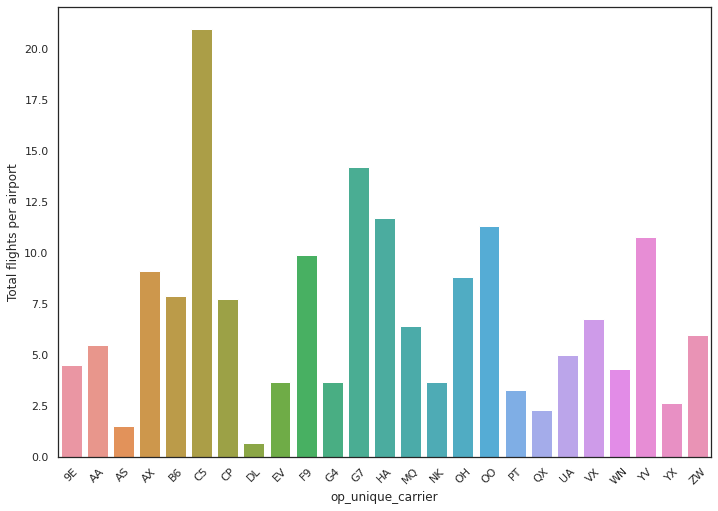

In [ ]:
#Bar plot of features and its scores
sns.set(rc={'figure.figsize':(11.7,8.27)})
import seaborn as sns
sns.set(style="white")
ax = sns.barplot(x=df_plot_avg.index, y=df_plot_avg.arr_delay)
plt.ylabel('Total flights per airport')
plt.xticks(rotation=45)

In [ ]:
# transform hour into category 
df_flights_module['dep_time'] = round(df_flights_module['dep_time']/100)
df_flights_module['arr_time'] = round(df_flights_module['arr_time']/100)




In [ ]:
# Create columns 
df_flights_module['origin_state']= df_flights_module['origin_city_name'].str[-2:]
df_flights_module['dest_state']= df_flights_module['dest_city_name'].str[-2:]



In [ ]:
# grouping the state columns into regions
df_flights_module= df_flights_module.replace({"origin_state" : {'IL': 1 ,'IN':1,'KY':1,'MO':1,'OH':1,'TN':1,'WV':1,
                                       'IA':2, 'MI':2, 'MN':2, 'WI':2,
                                       'CT': 3, 'DE':3, 'ME':3, 'MD':3, 'MA':3, 'NH':3, 'NJ':3, 'NY':3, 'PA':3, 'RI':3, 'VT':3,
                                       'ID': 4, 'OR':4, 'WA':4, 
                                       'AR':5, 'KS':5, 'LA':5, 'MS':5, 'OK':5, 'TX':5,
                                       'AL':6, 'FL':6, 'GA':6, 'NC':6, 'SC':6, 'VA':6,'DC':6,
                                       'AZ' :7, 'CO':7, 'NM':7, 'UT':7,
                                       'CA':8, 'NV':8,
                                       'MT':9, 'NE':9, 'ND':9, 'SD':9, 'WY':9,
                                       'HI':0, 'PR':0, 'AK':0, 'VI':0, 'TT':0}})

df_flights_module= df_flights_module.replace({"dest_state" : {'IL': 1 ,'IN':1,'KY':1,'MO':1,'OH':1,'TN':1,'WV':1,
                                       'IA':2, 'MI':2, 'MN':2, 'WI':2,
                                       'CT': 3, 'DE':3, 'ME':3, 'MD':3, 'MA':3, 'NH':3, 'NJ':3, 'NY':3, 'PA':3, 'RI':3, 'VT':3,
                                       'ID': 4, 'OR':4, 'WA':4, 
                                       'AR':5, 'KS':5, 'LA':5, 'MS':5, 'OK':5, 'TX':5,
                                       'AL':6, 'FL':6, 'GA':6, 'NC':6, 'SC':6, 'VA':6,'DC':6,
                                       'AZ' :7, 'CO':7, 'NM':7, 'UT':7,
                                       'CA':8, 'NV':8,
                                       'MT':9, 'NE':9, 'ND':9, 'SD':9, 'WY':9,
                                       'HI':0, 'PR':0, 'AK':0, 'VI':0, 'TT':0}})

In [ ]:
df_flights_module = df_flights_module.drop(columns=['origin','origin_city_name','dest','dest_city_name','total_add_gtime','first_dep_time'])


In [ ]:
# drop colay related to delays 
df_flights_module = df_flights_module.drop(columns=['carrier_delay', 'weather_delay', 'nas_delay','security_delay', 'late_aircraft_delay','no_name'])

In [ ]:
# frop colums relatest o time (redundance), cancel code, dup, crs_time
df_flights_module = df_flights_module.drop(columns=['crs_dep_time','cancellation_code','dup','crs_elapsed_time'])

In [ ]:
# Binalize arr_delay
def delay(x):
  if -70<= x <= 0 :
    return 1
  elif 1<x <=60:
    return 2
  elif 61<= x <=180:
    return 3
  elif 181<= x <=420:
    return 4
  else: return 5

df_flights_module['flight_delayed'] = df_flights_module['arr_delay'].apply(delay)

In [ ]:
# drop colums for arr_delay
df_flights_module = df_flights_module.drop(columns=['arr_delay'])

In [ ]:
# Create columns for month and week day
df_flights_module['month'] = df_flights_module['fl_date'].dt.month
df_flights_module['week_day'] = df_flights_module['fl_date'].dt.weekday

In [ ]:
# here I created the last file:
df_flights_module = pd.read_csv('df_flights_module_ final.csv')
df_flights_module = df_flights_module.drop(columns=('Unnamed: 0'))

In [ ]:
df_flights_module = df_flights_module.drop(columns=['dep_delay'])

In [ ]:
df_flights_module['op_unique_carrier'].unique()

array(['DL', 'YX', 'UA', 'WN', 'YV', 'OO', 'EV', 'NK', 'PT', 'OH', 'B6',
       'AA', 'AS', 'CP', '9E', 'G7', 'AX', 'HA', 'MQ', 'F9', 'QX', 'ZW',
       'VX', 'G4', 'C5'], dtype=object)

In [ ]:
df_flights_module= df_flights_module.replace({"op_unique_carrier" : {'DL': 1 ,'YX': 2,'UA': 3,'WN': 4,'YV': 5,'OO': 6,'EV': 7, 'NK': 8, 'PT': 9, 'OH': 10, 'B6': 11, 
                                                       'AA': 12, 'AS': 13, 'CP': 14, '9E': 15, 'G7': 16, 'AX': 17, 'HA': 18, 'MQ': 19, 'F9': 20, 'QX': 21, 'ZW': 22,
                                                       'VX': 23, 'G4': 24, 'C5': 25}})

In [ ]:
df_flights_module = df_flights_module.drop(columns=['actual_elapsed_time'])

In [ ]:
# Category the columns
df_flights_module['op_unique_carrier'] = df_flights_module['op_unique_carrier'].astype('category')
df_flights_module['origin_airport_id'] = df_flights_module['origin_airport_id'].astype('category')
df_flights_module['dest_airport_id'] = df_flights_module['dest_airport_id'].astype('category')
df_flights_module['cancelled'] = df_flights_module['cancelled'].astype('category')
df_flights_module['diverted'] = df_flights_module['diverted'].astype('category')
df_flights_module['month'] = df_flights_module['month'].astype('category')
df_flights_module['week_day'] = df_flights_module['week_day'].astype('category')
df_flights_module['origin_state'] = df_flights_module['origin_state'].astype('category')
df_flights_module['dest_state'] = df_flights_module['dest_state'].astype('category')
df_flights_module['flight_delayed'] = df_flights_module['flight_delayed'].astype('category')
df_flights_module['arr_time'] = df_flights_module['arr_time'].astype('category')
df_flights_module['dep_time'] = df_flights_module['dep_time'].astype('category')

In [ ]:
df_flights_module = df_flights_module.drop(columns=('fl_date'))

In [ ]:
df_flights_module['snow'] = pd.to_numeric(df_flights_module.snow,  errors='coerce')
df_flights_module['rain'] = pd.to_numeric(df_flights_module.rain,  errors='coerce')
df_flights_module['visibility'] = pd.to_numeric(df_flights_module.visibility,  errors='coerce')
df_flights_module['wind'] = pd.to_numeric(df_flights_module.wind,  errors='coerce')


In [ ]:
df_flights_module.dtypes

op_unique_carrier        category
origin_airport_id        category
dest_airport_id          category
dep_time                 category
taxi_out                  float64
taxi_in                   float64
arr_time                 category
cancelled                category
diverted                 category
air_time                  float64
distance                  float64
rain                      float64
snow                      float64
visibility                float64
wind                      float64
month                    category
week_day                 category
delay_average_carries     float64
origin_state             category
dest_state               category
flight_delayed           category
dtype: object

In [ ]:
df_flights_module

,op_unique_carrier,origin_airport_id,dest_airport_id,dep_time,taxi_out,taxi_in,arr_time,cancelled,diverted,air_time,distance,rain,snow,visibility,wind,month,week_day,delay_average_carries,origin_state,dest_state,flight_delayed
0,1,10397,15304,8.0,21.0,3.0,10.0,0.0,0.0,63.0,406.0,7.5,0.0,9,10,7,0,0.686165,6,6,1
1,1,10397,10423,13.0,12.0,8.0,14.0,0.0,0.0,108.0,813.0,0.0,0.0,10,12,6,3,0.686165,6,5,1
2,2,10693,11057,14.0,12.0,8.0,17.0,0.0,0.0,56.0,328.0,0.0,0.0,10,5,11,5,2.621795,1,6,1
3,3,12264,12892,17.0,15.0,7.0,19.0,0.0,0.0,298.0,2288.0,0.0,0.0,10,5,12,5,4.988605,6,8,1
4,4,10693,10397,13.0,10.0,6.0,15.0,0.0,0.0,38.0,214.0,0.0,0.0,10,14,3,2,4.285845,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35076,12,13495,11298,12.0,19.0,10.0,14.0,0.0,0.0,71.0,447.0,0.2,0.0,10,6,10,1,5.468287,5,5,1
35077,6,14747,11259,11.0,30.0,7.0,18.0,0.0,0.0,242.0,1670.0,1.9,0.0,10,8,6,6,11.327017,4,5,2
35078,12,11057,13930,7.0,62.0,15.0,9.0,0.0,0.0,92.0,599.0,1.0,2.7,3,23,12,6,5.468287,6,1,2
35079,1,10397,14683,11.0,21.0,4.0,12.0,0.0,0.0,114.0,874.0,0.0,0.0,10,34,5,5,0.686165,6,5,1


In [ ]:
# Filling the null values
df_flights_module["air_time"] = df_flights_module["air_time"].fillna(df_flights_module["air_time"].mean())
df_flights_module["taxi_in"] = df_flights_module["taxi_in"].fillna(df_flights_module["taxi_in"].mean())
df_flights_module["taxi_out"] = df_flights_module["taxi_out"].fillna(df_flights_module["taxi_out"].mean())
df_flights_module["wind"] = df_flights_module["wind"].fillna(df_flights_module["wind"].mean())
df_flights_module["visibility"] = df_flights_module["visibility"].fillna(df_flights_module["visibility"].mean())
df_flights_module["snow"] = df_flights_module["snow"].fillna(df_flights_module["snow"].mean())
df_flights_module["rain"] = df_flights_module["wind"].fillna(df_flights_module["rain"].mean())

In [ ]:
df_flights_module["arr_time"] = df_flights_module["arr_time"].fillna(df_flights_module["arr_time"].mode().iloc[0])
df_flights_module["dep_time"] = df_flights_module["dep_time"].fillna(df_flights_module["dep_time"].mode().iloc[0])


In [ ]:
# checking fo =r miising values
total = df_flights_module.isnull().sum().sort_values(ascending=False)
percent = (df_flights_module.isnull().sum()/df_flights_module.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1, keys=['Total','Percent'])
missing_data.head(15)

,Total,Percent
flight_delayed,0,0.0
air_time,0,0.0
origin_airport_id,0,0.0
dest_airport_id,0,0.0
dep_time,0,0.0
taxi_out,0,0.0
taxi_in,0,0.0
arr_time,0,0.0
cancelled,0,0.0
diverted,0,0.0


In [ ]:
df_flights_module.to_csv('df_flights_module_Final_Rev_2.csv')

___
___


### Clustering - K-Means


In [ ]:
df_flights_module = pd.read_csv('df_flights_module_Final_Rev_2.csv')
df_flights_module = df_flights_module.drop(columns=('Unnamed: 0'))

In [ ]:
# scaling
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
df_flights_module_scaled = pd.DataFrame(scaler.fit_transform(df_flights_module), columns = df_flights_module.columns)

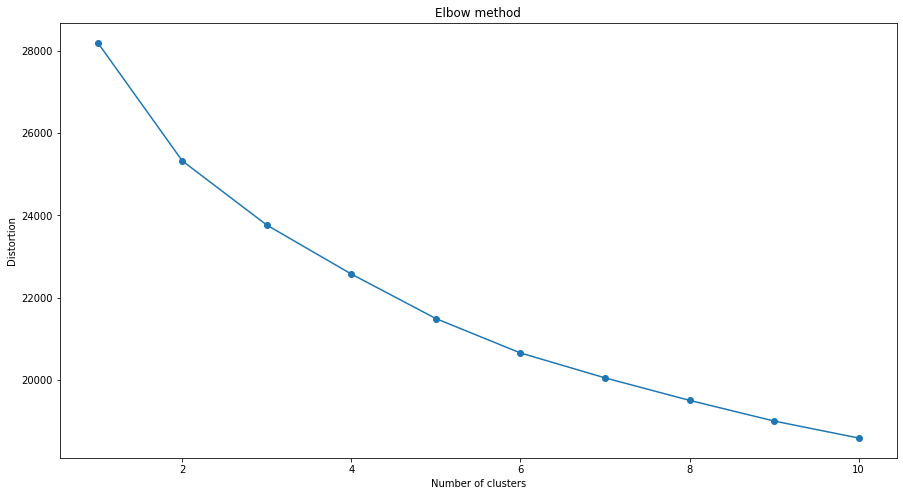

In [ ]:
# elbow plot
#import matplotlib
import matplotlib.pyplot as plt
# elbow rule
def plot_inertia(df):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i,
                    n_init=10,
                    random_state=0)
        km.fit(df)
        distortions.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(range(1,11), distortions, marker='o')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Distortion')
    ax.set_title('Elbow method')
    plt.show()
plot_inertia(df_flights_module_scaled)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)

In [ ]:
km = KMeans(n_clusters = 8,
            n_init=10,
            random_state=0)

In [ ]:
y_km = km.fit_predict(df_flights_module_scaled)

In [ ]:
km.labels_

array([2, 1, 5, ..., 0, 0, 2], dtype=int32)

In [ ]:
df_flights_module['K-mean_clusters'] = km.labels_

In [ ]:
y_km = km.fit_predict(df_flights_module_scaled)

In [ ]:
df_flights_module

,op_unique_carrier,origin_airport_id,dest_airport_id,dep_time,taxi_out,taxi_in,arr_time,cancelled,diverted,air_time,distance,rain,snow,visibility,wind,month,week_day,delay_average_carries,origin_state,dest_state,flight_delayed,K-mean_clusters
0,1,10397,15304,8.0,21.0,3.0,10.0,0.0,0.0,63.0,406.0,10.00000,0.000000,9.000000,10.00000,7,0,0.686165,6,6,1,2
1,1,10397,10423,13.0,12.0,8.0,14.0,0.0,0.0,108.0,813.0,12.00000,0.000000,10.000000,12.00000,6,3,0.686165,6,5,1,1
2,2,10693,11057,14.0,12.0,8.0,17.0,0.0,0.0,56.0,328.0,5.00000,0.000000,10.000000,5.00000,11,5,2.621795,1,6,1,5
3,3,12264,12892,17.0,15.0,7.0,19.0,0.0,0.0,298.0,2288.0,5.00000,0.000000,10.000000,5.00000,12,5,4.988605,6,8,1,5
4,4,10693,10397,13.0,10.0,6.0,15.0,0.0,0.0,38.0,214.0,14.00000,0.000000,10.000000,14.00000,3,2,4.285845,1,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35076,12,13495,11298,12.0,19.0,10.0,14.0,0.0,0.0,71.0,447.0,6.00000,0.000000,10.000000,6.00000,10,1,5.468287,5,5,1,2
35077,6,14747,11259,11.0,30.0,7.0,18.0,0.0,0.0,242.0,1670.0,8.00000,0.000000,10.000000,8.00000,6,6,11.327017,4,5,2,1
35078,12,11057,13930,7.0,62.0,15.0,9.0,0.0,0.0,92.0,599.0,23.00000,2.700000,3.000000,23.00000,12,6,5.468287,6,1,2,0
35079,1,10397,14683,11.0,21.0,4.0,12.0,0.0,0.0,114.0,874.0,34.00000,0.000000,10.000000,34.00000,5,5,0.686165,6,5,1,0


In [ ]:
df_flights_module['K-mean_clusters'] = df_flights_module['K-mean_clusters'].astype('category')

In [8]:
#Save and loar point
# df_flights_module.to_csv('df_flights_module_Final_Rev_3.csv')

df_flights_module = pd.read_csv('df_flights_module_Final_Rev_3.csv')
df_flights_module = df_flights_module.drop(columns=('Unnamed: 0'))

In [18]:
df_flights_module.to_csv('df_flights_module_Final_Rev_4.csv')


In [37]:
df_flights_module

,op_unique_carrier,origin_airport_id,dest_airport_id,dep_time,arr_time,distance,rain,snow,visibility,wind,month,week_day,delay_average_carries,origin_state,dest_state,flight_delayed
0,1,10397,15304,8.0,10.0,406.0,10.00000,0.000000,9.000000,10.00000,7,0,0.686165,6,6,1
1,1,10397,10423,13.0,14.0,813.0,12.00000,0.000000,10.000000,12.00000,6,3,0.686165,6,5,1
2,2,10693,11057,14.0,17.0,328.0,5.00000,0.000000,10.000000,5.00000,11,5,2.621795,1,6,1
3,3,12264,12892,17.0,19.0,2288.0,5.00000,0.000000,10.000000,5.00000,12,5,4.988605,6,8,1
4,4,10693,10397,13.0,15.0,214.0,14.00000,0.000000,10.000000,14.00000,3,2,4.285845,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35076,12,13495,11298,12.0,14.0,447.0,6.00000,0.000000,10.000000,6.00000,10,1,5.468287,5,5,1
35077,6,14747,11259,11.0,18.0,1670.0,8.00000,0.000000,10.000000,8.00000,6,6,11.327017,4,5,2
35078,12,11057,13930,7.0,9.0,599.0,23.00000,2.700000,3.000000,23.00000,12,6,5.468287,6,1,2
35079,1,10397,14683,11.0,12.0,874.0,34.00000,0.000000,10.000000,34.00000,5,5,0.686165,6,5,1


In [13]:
df_flights_module = df_flights_module.drop(columns=['taxi_out','taxi_in','cancelled','diverted','air_time','K-mean_clusters'])

In [ ]:
# scaling
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
df_flights_module_scaled = pd.DataFrame(scaler.fit_transform(df_flights_module), columns = df_flights_module.columns)

In [ ]:
# Creating Dataframe for split
X = df_flights_module_scaled.drop(columns=('flight_delayed'))
y = df_flights_module['flight_delayed']

___
___

## Modeling With Clustering 

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)


y_pred =logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy_test = accuracy_score(y_test,y_pred)

print( accuracy_test)

0.7211264394025767


In [ ]:
# import f1_score from sklearn
from sklearn.metrics import f1_score

# compute f1_score
f1_score = f1_score(y_test,y_pred, average='micro',)

print(f1_score)

0.7211264394025768


In [ ]:
from sklearn.metrics import classification_report
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      0.95      0.83      5551
           2       0.62      0.31      0.41      2321
           3       0.50      0.00      0.01       494
           4       1.00      0.06      0.11        86
           5       0.93      0.97      0.95       319

    accuracy                           0.72      8771
   macro avg       0.76      0.46      0.46      8771
weighted avg       0.70      0.72      0.67      8771



#### Naive Regression

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_naive = clf.predict(X_test)

In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred_naive)

print(accuracy)

0.6806521491278076


In [ ]:
# import f1_score from sklearn
from sklearn.metrics import f1_score

# compute f1_score
f1_score = f1_score(y_test,y_pred_naive, average='micro',)

print(f1_score)

0.6806521491278076


In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.71      0.93      0.80      5551
           2       0.56      0.26      0.36      2321
           3       0.33      0.11      0.16       494
           4       0.08      0.07      0.07        86
           5       0.98      0.45      0.62       319

    accuracy                           0.68      8771
   macro avg       0.53      0.36      0.40      8771
weighted avg       0.65      0.68      0.63      8771



#### XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBosst = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,  
                                 max_depth=1, random_state=0).fit(X_train, y_train)
GBosst.score(X_test, y_test)

0.684756584197925

In [ ]:
y_pred_Gboost = GBosst.predict(X_test)

In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred_Gboost)

print(accuracy)

0.684756584197925


In [ ]:
# import f1_score from sklearn
from sklearn.metrics import f1_score

# compute f1_score
f1_score = f1_score(y_test,y_pred_Gboost, average='micro',)

print(f1_score)

0.684756584197925


In [ ]:
from sklearn.metrics import classification_report
y_pred = GBosst.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      0.94      0.82      5551
           2       0.59      0.31      0.41      2321
           3       0.45      0.08      0.14       494
           4       0.09      0.38      0.15        86
           5       0.00      0.00      0.00       319

    accuracy                           0.68      8771
   macro avg       0.37      0.34      0.30      8771
weighted avg       0.65      0.68      0.64      8771



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_f = RandomForestClassifier(n_estimators=100)

random_f.fit(X_train, y_train)
y_pred_Ran = random_f.predict(X_test)

In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred_Ran)

print(accuracy)

0.7218105119142629


In [ ]:
# import f1_score from sklearn
from sklearn.metrics import f1_score

# compute f1_score
f1_score = f1_score(y_test,y_pred_Ran, average='macro',)

print(f1_score)

0.510399851843993


In [ ]:
from sklearn.metrics import classification_report
y_pred = random_f.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      0.94      0.82      5551
           2       0.60      0.33      0.42      2321
           3       0.63      0.05      0.10       494
           4       0.92      0.14      0.24        86
           5       0.94      1.00      0.97       319

    accuracy                           0.72      8771
   macro avg       0.77      0.49      0.51      8771
weighted avg       0.70      0.72      0.68      8771



### Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

#### Logistic Regression

In [ ]:
log_red = cross_val_score(logreg,X,y, cv=5)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/lin

In [ ]:
print(f'Cross-validates with Logistc regression:\nMean\t{log_red.mean()}\nSTD:\t{log_red.std()}')

Cross-validates with Logistc regression:
Mean	0.7268036218930114
STD:	0.0020266355508904246


#### Naive Regression

In [ ]:
naive = cross_val_score(clf,X,y, cv=5)

In [ ]:
print(f'Cross-validates with Naive Bayers:\nMean\t{naive.mean()}\nSTD:\t{naive.std()}')

Cross-validates with Naive Bayers:
Mean	0.6875230930454123
STD:	0.004437030371625047


#### XGBoost

In [ ]:
xgboost = cross_val_score(GBosst,X,y, cv=5)

In [ ]:
print(f'Cross-validates with XGBoost:\nMean\t{xgboost.mean()}\nSTD:\t{xgboost.std()}')

Cross-validates with XGBoost:
Mean	0.6936803989139262
STD:	0.0048526632044641185


#### Random Forest

In [ ]:
rand_cross = cross_val_score(random_f,X,y, cv=5)

In [ ]:
print(f'Cross-validates with Randon Forest:\nMean\t{rand_cross.mean()}\nSTD:\t{rand_cross.std()}')

Cross-validates with Randon Forest:
Mean	0.7291696505424439
STD:	0.0031542911970739687


### Hyperparamenter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#### Logistic Regression

In [ ]:
logreg.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# # Make a dictionary with model arguments as keys and lists of grid settings as values
# param_grid = {
#     'penalty' : ['l1', 'l2'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['liblinear']}


# grid_logistic = GridSearchCV(estimator=logreg, param_grid=param_grid, cv= 5, verbose=1, n_jobs=-1) # verbose=1 -> print results, n_jobs=-1 -> use all processors in parallel
# grid_result = grid_logistic.fit(X_train,y_train)


In [ ]:
# best_result = grid_logistic.best_score_
# best_penalty = grid_logistic.best_params_['penalty']
# best_C = grid_logistic.best_params_['C']
# best_solver = grid_logistic.best_params_['solver']
# print(f'Best score:\t{best_result}\nBest penalty:\t{best_penalty}\nBest C:\t{best_C}\nnBest solver:\t{best_solver}\n')

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(penalty='l2',C=1438.44988828766,solver='liblinear')

# fit the model with data
logreg.fit(X_train,y_train)


y_pred =logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy_test = accuracy_score(y_test,y_pred)

print( accuracy_test)

0.7206703910614525


In [ ]:
from sklearn.metrics import classification_report
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      0.95      0.83      5551
           2       0.62      0.31      0.41      2321
           3       0.00      0.00      0.00       494
           4       1.00      0.02      0.05        86
           5       0.95      0.97      0.96       319

    accuracy                           0.72      8771
   macro avg       0.66      0.45      0.45      8771
weighted avg       0.67      0.72      0.67      8771



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Naive Regression

In [ ]:
clf.get_params(deep=True)

In [ ]:
# # Make a dictionary with model arguments as keys and lists of grid settings as values
# param_grid = {
#   'var_smoothing': np.logspace(0,-9, num=100)
#   }

# k_folds = 5

# grid_naive = GridSearchCV(estimator=clf, param_grid=param_grid, cv=k_folds, verbose=1, n_jobs=-1) # verbose=1 -> print results, n_jobs=-1 -> use all processors in parallel
# grid_result_naive = grid_naive.fit(X_train, y_train)


In [ ]:
# best_result = grid_naive.best_score_
# best_smoothing = grid_naive.best_params_['var_smoothing']

# print(f'Best score:\t{best_result}\nBest var_smoothing:\t{best_smoothing}')

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB(var_smoothing = 3.5111917342151277e-08)
clf.fit(X_train, y_train)
y_pred_naive = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred_naive)

print(accuracy)

0.6806521491278076


In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.71      0.93      0.80      5551
           2       0.56      0.26      0.36      2321
           3       0.33      0.11      0.16       494
           4       0.08      0.07      0.07        86
           5       0.98      0.45      0.62       319

    accuracy                           0.68      8771
   macro avg       0.53      0.36      0.40      8771
weighted avg       0.65      0.68      0.63      8771



## Modeling without clustering

In [ ]:
# scaling
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
df_flights_module_scaled = pd.DataFrame(scaler.fit_transform(df_flights_module), columns = df_flights_module.columns)

In [ ]:
X_nc = df_flights_module_scaled.drop(columns=(['flight_delayed','K-mean_clusters']))
y_nc = df_flights_module['flight_delayed']

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#### Logsitic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg_nc = LogisticRegression()

# fit the model with data
logreg_nc.fit(X_train,y_train)


y_pred =logreg_nc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy_test = accuracy_score(y_test,y_pred)

print( accuracy_test)

0.7211264394025767


In [ ]:
from sklearn.metrics import classification_report
y_pred = logreg_nc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      0.95      0.83      5551
           2       0.62      0.31      0.41      2321
           3       0.50      0.00      0.01       494
           4       1.00      0.06      0.11        86
           5       0.93      0.97      0.95       319

    accuracy                           0.72      8771
   macro avg       0.76      0.46      0.46      8771
weighted avg       0.70      0.72      0.67      8771



#### Naive Regression

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_nc = GaussianNB()
clf_nc.fit(X_train, y_train)
y_pred_naive = clf_nc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred_naive)

print(accuracy)

0.6806521491278076


In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.71      0.93      0.80      5551
           2       0.56      0.26      0.36      2321
           3       0.33      0.11      0.16       494
           4       0.08      0.07      0.07        86
           5       0.98      0.45      0.62       319

    accuracy                           0.68      8771
   macro avg       0.53      0.36      0.40      8771
weighted avg       0.65      0.68      0.63      8771



#### XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBosst_nc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,  
                                 max_depth=1, random_state=0).fit(X_train, y_train)
GBosst_nc.score(X_test, y_test)

0.684756584197925

In [ ]:
y_pred_Gboost = GBosst_nc.predict(X_test)

In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred_Gboost)

print(accuracy)

0.684756584197925


In [ ]:
from sklearn.metrics import classification_report
y_pred = GBosst_nc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      0.94      0.82      5551
           2       0.59      0.31      0.41      2321
           3       0.45      0.08      0.14       494
           4       0.09      0.38      0.15        86
           5       0.00      0.00      0.00       319

    accuracy                           0.68      8771
   macro avg       0.37      0.34      0.30      8771
weighted avg       0.65      0.68      0.64      8771



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_f_nc = RandomForestClassifier(n_estimators=100)

random_f_nc.fit(X_train, y_train)
y_pred_Ran_nc = random_f_nc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred_Ran)

print(accuracy)

0.7218105119142629


In [ ]:
from sklearn.metrics import classification_report
y_pred = random_f_nc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      0.94      0.83      5551
           2       0.61      0.33      0.43      2321
           3       0.69      0.05      0.09       494
           4       0.81      0.15      0.25        86
           5       0.94      0.99      0.96       319

    accuracy                           0.72      8771
   macro avg       0.76      0.49      0.51      8771
weighted avg       0.71      0.72      0.68      8771



### Cross-Validation


#### Logistic Regression

In [ ]:
log_red = cross_val_score(logreg_nc,X,y, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/lin

In [ ]:
print(f'Cross-validates with Logistc regression:\nMean\t{log_red.mean()}\nSTD:\t{log_red.std()}')

Cross-validates with Logistc regression:
Mean	0.7268036218930114
STD:	0.0020266355508904246


#### Naive Regression

In [ ]:
naive = cross_val_score(clf_nc,X,y, cv=5)

In [ ]:
print(f'Cross-validates with Naive Bayers:\nMean\t{naive.mean()}\nSTD:\t{naive.std()}')

Cross-validates with Naive Bayers:
Mean	0.6875230930454123
STD:	0.004437030371625047


#### XGBoost

In [ ]:
xgboost = cross_val_score(GBosst_nc,X,y, cv=5)

In [ ]:
print(f'Cross-validates with XGBoost:\nMean\t{xgboost.mean()}\nSTD:\t{xgboost.std()}')

Cross-validates with XGBoost:
Mean	0.6936803989139262
STD:	0.0048526632044641185


In [ ]:
rand_cross = cross_val_score(random_f_nc,X,y, cv=5)

In [ ]:
print(f'Cross-validates with Randon Forest:\nMean\t{rand_cross.mean()}\nSTD:\t{rand_cross.std()}')

Cross-validates with Randon Forest:
Mean	0.7298252785343429
STD:	0.002580467821620922


### Randon Forest

In [ ]:
rand_cross = cross_val_score(random_f_nc,X,y, cv=5)

In [ ]:
print(f'Cross-validates with Randon Forest:\nMean\t{rand_cross.mean()}\nSTD:\t{rand_cross.std()}')

Cross-validates with Randon Forest:
Mean	0.7276018096790187
STD:	0.0014842782713624105


### Hyperparamenters Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#### Logistic Regression

In [ ]:
logreg.get_params(deep=True)

{'C': 1438.44988828766,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Make a dictionary with model arguments as keys and lists of grid settings as values
# param_grid = {
#     'penalty' : ['l1', 'l2'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['liblinear']}


# grid_logistic = GridSearchCV(estimator=logreg_nc, param_grid=param_grid, cv= 5, verbose=1, n_jobs=-1) # verbose=1 -> print results, n_jobs=-1 -> use all processors in parallel
# grid_result = grid_logistic.fit(X_train,y_train)


In [ ]:
# best_result = grid_logistic.best_score_
# best_penalty = grid_logistic.best_params_['penalty']
# best_C = grid_logistic.best_params_['C']
# best_solver = grid_logistic.best_params_['solver']
# print(f'Best score:\t{best_result}\nBest penalty:\t{best_penalty}\nBest C:\t{best_C}\nnBest solver:\t{best_solver}\n')

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(penalty='l1',C=3792.690190732246,solver='liblinear')

# fit the model with data
logreg.fit(X_train,y_train)


y_pred =logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy_test = accuracy_score(y_test,y_pred)

print( accuracy_test)

0.7207844031467335


In [ ]:
from sklearn.metrics import classification_report
y_pred = logreg_nc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      0.95      0.83      5551
           2       0.62      0.31      0.41      2321
           3       0.50      0.00      0.01       494
           4       1.00      0.06      0.11        86
           5       0.93      0.97      0.95       319

    accuracy                           0.72      8771
   macro avg       0.76      0.46      0.46      8771
weighted avg       0.70      0.72      0.67      8771



#### Naive Regression

In [ ]:
clf.get_params(deep=True)

{'priors': None, 'var_smoothing': 3.5111917342151277e-08}

In [ ]:
# # Make a dictionary with model arguments as keys and lists of grid settings as values
# param_grid = {
#   'var_smoothing': np.logspace(0,-9, num=100)
#   }

# k_folds = 5

# grid_naive = GridSearchCV(estimator=clf_nc, param_grid=param_grid, cv=k_folds, verbose=1, n_jobs=-1) # verbose=1 -> print results, n_jobs=-1 -> use all processors in parallel
# grid_result_naive = grid_naive.fit(X_train, y_train)


In [ ]:
# best_result = grid_naive.best_score_
# best_smoothing = grid_naive.best_params_['var_smoothing']

# print(f'Best score:\t{best_result}\nBest var_smoothing:\t{best_smoothing}')

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB(var_smoothing = 0.01)
clf.fit(X_train, y_train)
y_pred_naive = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred_naive)

print(accuracy)

0.6900011401208528


In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.70      0.96      0.81      5551
           2       0.63      0.22      0.32      2321
           3       0.41      0.10      0.16       494
           4       0.17      0.08      0.11        86
           5       0.98      0.45      0.62       319

    accuracy                           0.69      8771
   macro avg       0.58      0.36      0.40      8771
weighted avg       0.67      0.69      0.63      8771



#### XGBoost

In [ ]:
GBosst_nc.get_params(deep=True)

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1.0,
 'loss': 'deviance',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# param_grid = {
#   "learning_rate"    : [ 0.5, 1.0, 1.5] ,
#   "max_depth"        : [ 1, 5, 10],
#   'n_estimators': [ 50, 100, 150],
#   "ccp_alpha"            : [ 0.0, 0.1, 0.2 ]
# }

# k_folds = 5

# grid_naive = GridSearchCV(estimator=GBosst_nc, param_grid=param_grid, cv=k_folds, verbose=1, n_jobs=-1) # verbose=1 -> print results, n_jobs=-1 -> use all processors in parallel
# grid_result_naive = grid_naive.fit(X_train, y_train)

In [ ]:
# best_result = grid_naive.best_score_
# best_learning_rate = grid_naive.best_params_['learning_rate']
# best_max_depth = grid_naive.best_params_['max_depth']
# best_n_estimators = grid_naive.best_params_['n_estimators']
# best_n_ccp_alpha = grid_naive.best_params_['ccp_alpha']
# print(f'Best score:\t{best_result}\nBest learning_rate:\t{best_learning_rate}\nBest max_depth:\t{best_max_depth}\nnBest estimators:\t{best_n_estimators}\nbest_n_ccp_alpha:\t{best_n_ccp_alpha}')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBosst_nc = GradientBoostingClassifier(n_estimators=150, learning_rate=0.5,  
                                 max_depth=1, random_state=0).fit(X_train, y_train)
GBosst_nc.score(X_test, y_test)

0.7214684756584198

In [ ]:
y_pred_Gboost = GBosst_nc.predict(X_test)

In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# compute accuracy
accuracy = accuracy_score(y_test,y_pred_Gboost)

print(accuracy)

0.7214684756584198


In [ ]:
from sklearn.metrics import classification_report
y_pred = GBosst_nc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      0.94      0.82      5551
           2       0.61      0.31      0.42      2321
           3       0.59      0.08      0.14       494
           4       0.00      0.00      0.00        86
           5       0.91      1.00      0.95       319

    accuracy                           0.72      8771
   macro avg       0.57      0.47      0.47      8771
weighted avg       0.69      0.72      0.67      8771



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Random Forest

In [ ]:
random_f_nc.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# # Make a dictionary with model arguments as keys and lists of grid settings as values
# param_grid = {
#     'max_depth' : [2,4,5,10,20,50],
#     'n_estimators':[100, 1000, 10000,],
#     'min_samples_split' : [5, 10, 50, 100]
# }
# k_folds = 5

# grid = GridSearchCV(estimator=random_f_nc, param_grid=param_grid, cv=k_folds, verbose=1, n_jobs=-1) # verbose=1 -> print results, n_jobs=-1 -> use all processors in parallel
# grid_result_ = grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 12.6min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 85.3min
exception calling callback for <Future at 0x7f771c6517f0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/usr/local/li

TerminatedWorkerError: ignored

tes


## SMOTE

In [ ]:
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



Class=0, n=22317 (63.616%)
Class=1, n=9328 (26.590%)
Class=4, n=1301 (3.709%)
Class=2, n=1797 (5.122%)
Class=3, n=338 (0.963%)


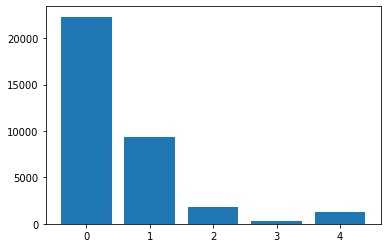

In [ ]:
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Class=2, n=16766 (20.000%)
Class=3, n=16766 (20.000%)
Class=1, n=16766 (20.000%)
Class=5, n=16766 (20.000%)
Class=4, n=16766 (20.000%)


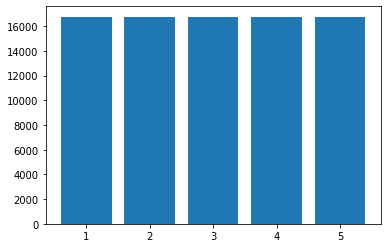

In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Modeling for continuos values

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
list_bins_mean = [ -35, 30.5, 120.5, 300.5, 1060]

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(penalty='l1',C=3792.690190732246,solver='liblinear')

# fit the model with data
logreg.fit(X_train,y_train)


y_pred =logreg.predict_proba(X_test)

In [ ]:
y_pred_log = y_pred.dot(list_bins_mean)

In [ ]:
r2_y_pred_log = r2_score(y_test, y_pred_log, multioutput='variance_weighted')
print( r2_y_pred_log) 

-28986.93330461265


### XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBosst_nc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,  
                                 max_depth=1, random_state=0).fit(X_train, y_train)
y_pred_G = GBosst_nc.predict_prob(X_test)

In [ ]:
y_pred_Gboost = y_y_pred_Gpred.dot(list_bins_mean)

In [ ]:
r2_y_pred_Gboost = r2_score(y_test, y_pred_Gboost, multioutput='variance_weighted')
print( r2_y_pred_Gboost) 

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_f_nc = RandomForestClassifier(n_estimators=100)

random_f.fit(X_train, y_train)
y_pred_Ran_nc = random_f.predict_proba(X_test)

In [ ]:
r2_y_pred_Gboost = r2_score(y_test, y_pred_Gboost, multioutput='variance_weighted')
print( r2_y_pred_Gboost) 

___
___
### Weather API

In [ ]:
for k in range(38,35080):
  try:
    file_name = df_flights_pre['dest_city_name'].iloc[k][:-4]
    df_city_weather = pd.read_csv(f'{file_name}.csv')
  except FileNotFoundError:
    print(file_name)
    k = k+1
    continue
  for j in range(0,1459):
    if df_city_weather['date_time'].iloc[j][:-9] == df_flights_pre['fl_date'].iloc[k]:
      df_flights_pre['snow'].iloc[k] = df_city_weather['totalSnow_cm'].iloc[j]
      df_flights_pre['wind'].iloc[k] = df_city_weather['windspeedKmph'].iloc[j]
      df_flights_pre['visibility'].iloc[k] = df_city_weather['visibility'].iloc[j]
      df_flights_pre['rain'].iloc[k] = df_city_weather['precipMM'].iloc[j]

In [ ]:
pip install wwo-hist

In [ ]:
# df_flights_pre
name = df_flights_pre['dest_city_name'].str.contains('/')
df_flights_pre_test = df_flights_pre[name]

In [ ]:
df_flights_pre_test['dest_city_name'].unique()

In [ ]:

from wwo_hist import retrieve_hist_data

frequency=24
start_date = '01-JAN-2018'
end_date = '31-DEC-2019'
api_key = 'fbf6f36be62d47f984463151211201'
location_list = ['CapeGirardeau,MO']
hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = False,
                                store_df  = True)

In [ ]:
hist_weather_data[0].to_csv('Cape Girardeau.csv')

In [ ]:
name = df_flights_pre['dest_city_name'].str.contains('Tampa')

df_flights_pre[name]

In [62]:
df_flights_test = pd.read_csv('df_flights_test_weather_Rev4.csv')
df_flights_test = df_flights_test.drop(columns=('Unnamed: 0'))

###Previsions

In [63]:
df_flights_test

,op_unique_carrier,origin_airport_id,dest_airport_id,crs_dep_time,crs_elapsed_time,distance,month,week_day,origin_state,dest_state,rain,snow,visibility,wind,delay_average_carries,crs_arr_time
0,4,13891,14771,18.0,95,363,1,2,8,8,0.0,0.0,10,10,4.285845,19.0
1,4,13891,14771,12.0,90,363,1,2,8,8,0.0,0.0,10,10,4.285845,13.0
2,4,13891,14831,20.0,70,333,1,2,8,8,0.0,0.0,10,18,4.285845,21.0
3,4,13891,14831,13.0,75,333,1,2,8,8,0.0,0.0,10,18,4.285845,15.0
4,4,13891,14831,9.0,80,333,1,2,8,8,0.0,0.0,10,18,4.285845,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150618,15,11433,12478,18.0,117,509,1,1,2,3,0.2,0.0,7,12,4.489633,20.0
150619,15,11996,12953,6.0,119,610,1,1,6,3,0.2,0.0,7,12,4.489633,8.0
150620,15,10397,15919,17.0,121,589,1,1,6,5,2.8,0.0,10,15,4.489633,18.0
150621,15,15919,10397,19.0,114,589,1,1,5,6,0.5,0.0,10,18,4.489633,21.0


In [64]:
df_flights_test_final = pd.read_csv('df_flights_test_jan_7_featured.csv')
df_flights_test_final = df_flights_test_final.drop(columns=('Unnamed: 0'))

In [65]:
df_flights_test_final

,fl_date,op_unique_carrier,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_elapsed_time,distance,month,week_day,origin_state,dest_state
0,2020-01-01,WN,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",18.0,95,363,1,2,8,8
1,2020-01-01,WN,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",12.0,90,363,1,2,8,8
2,2020-01-01,WN,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",20.0,70,333,1,2,8,8
3,2020-01-01,WN,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",13.0,75,333,1,2,8,8
4,2020-01-01,WN,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",9.0,80,333,1,2,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150618,2020-01-07,9E,11433,DTW,"Detroit, MI",12478,JFK,"New York, NY",18.0,117,509,1,1,2,3
150619,2020-01-07,9E,11996,GSP,"Greer, SC",12953,LGA,"New York, NY",6.0,119,610,1,1,6,3
150620,2020-01-07,9E,10397,ATL,"Atlanta, GA",15919,XNA,"Fayetteville, AR",17.0,121,589,1,1,6,5
150621,2020-01-07,9E,15919,XNA,"Fayetteville, AR",10397,ATL,"Atlanta, GA",19.0,114,589,1,1,5,6


In [66]:
df_pred  = pd.read_csv('final_pred.csv')
df_pred = df_pred.drop(columns=('Unnamed: 0'))

In [28]:
df_pred

,0
0,0.340384
1,-11.823826
2,1.148412
3,-2.429248
4,-11.148761
...,...
95208,-17.088016
95209,4.632367
95210,-8.400677
95211,-16.089737


In [77]:
final_list = pd.merge(df_flights_test_final, df_pred, left_index=True, right_index=True, how="left")

In [78]:
final_list = final_list.rename(columns=({'0': 'predicted_delay'}))



In [79]:
final_list

,fl_date,op_unique_carrier,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_elapsed_time,distance,month,week_day,origin_state,dest_state,predicted_delay
0,2020-01-01,WN,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",18.0,95,363,1,2,8,8,0.340384
1,2020-01-01,WN,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",12.0,90,363,1,2,8,8,-11.823826
2,2020-01-01,WN,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",20.0,70,333,1,2,8,8,1.148412
3,2020-01-01,WN,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",13.0,75,333,1,2,8,8,-2.429248
4,2020-01-01,WN,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",9.0,80,333,1,2,8,8,-11.148761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150618,2020-01-07,9E,11433,DTW,"Detroit, MI",12478,JFK,"New York, NY",18.0,117,509,1,1,2,3,NaN
150619,2020-01-07,9E,11996,GSP,"Greer, SC",12953,LGA,"New York, NY",6.0,119,610,1,1,6,3,NaN
150620,2020-01-07,9E,10397,ATL,"Atlanta, GA",15919,XNA,"Fayetteville, AR",17.0,121,589,1,1,6,5,NaN
150621,2020-01-07,9E,15919,XNA,"Fayetteville, AR",10397,ATL,"Atlanta, GA",19.0,114,589,1,1,5,6,NaN


In [80]:
mkt_carrier_fl_num

0         5888
1         6276
2         4598
3         4761
4         5162
          ... 
150618    4813
150619    4814
150620    4815
150621    4815
150622    4816
Name: mkt_carrier_fl_num, Length: 150623, dtype: int64

In [81]:
final_list_sub = pd.merge(final_list, mkt_carrier_fl_num, left_index=True, right_index=True)


In [82]:
final_list_sub = final_list_sub[['fl_date','op_unique_carrier','mkt_carrier_fl_num','origin','dest','predicted_delay']]

In [83]:
# Filling the null values
final_list_sub["predicted_delay"] = final_list_sub["predicted_delay"].fillna(final_list_sub["predicted_delay"].median())


Final List

In [85]:
final_list_sub = final_list_sub.set_index('fl_date')

In [86]:
final_list_sub

,op_unique_carrier,mkt_carrier_fl_num,origin,dest,predicted_delay
fl_date,,,,,
2020-01-01,WN,5888,ONT,SFO,0.340384
2020-01-01,WN,6276,ONT,SFO,-11.823826
2020-01-01,WN,4598,ONT,SJC,1.148412
2020-01-01,WN,4761,ONT,SJC,-2.429248
2020-01-01,WN,5162,ONT,SJC,-11.148761
...,...,...,...,...,...
2020-01-07,9E,4813,DTW,JFK,-3.917438
2020-01-07,9E,4814,GSP,LGA,-3.917438
2020-01-07,9E,4815,ATL,XNA,-3.917438


In [87]:
final_list_sub.to_csv('submission.csv')

In [40]:
test_1 = df_pred  = pd.read_csv('df_flights_test_weather_Rev4.csv')
test_1 = test_1.drop(columns=('Unnamed: 0'))

In [41]:
test_1

,op_unique_carrier,origin_airport_id,dest_airport_id,crs_dep_time,crs_elapsed_time,distance,month,week_day,origin_state,dest_state,rain,snow,visibility,wind,delay_average_carries,crs_arr_time
0,4,13891,14771,18.0,95,363,1,2,8,8,0.0,0.0,10,10,4.285845,19.0
1,4,13891,14771,12.0,90,363,1,2,8,8,0.0,0.0,10,10,4.285845,13.0
2,4,13891,14831,20.0,70,333,1,2,8,8,0.0,0.0,10,18,4.285845,21.0
3,4,13891,14831,13.0,75,333,1,2,8,8,0.0,0.0,10,18,4.285845,15.0
4,4,13891,14831,9.0,80,333,1,2,8,8,0.0,0.0,10,18,4.285845,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150618,15,11433,12478,18.0,117,509,1,1,2,3,0.2,0.0,7,12,4.489633,20.0
150619,15,11996,12953,6.0,119,610,1,1,6,3,0.2,0.0,7,12,4.489633,8.0
150620,15,10397,15919,17.0,121,589,1,1,6,5,2.8,0.0,10,15,4.489633,18.0
150621,15,15919,10397,19.0,114,589,1,1,5,6,0.5,0.0,10,18,4.489633,21.0


In [43]:
test_2 = df_pred  = pd.read_csv('df_flights_module_Final_Rev_4 -slack(1).csv')
test_2 = test_2.drop(columns=('Unnamed: 0'))

In [44]:
test_2

,op_unique_carrier,origin_airport_id,dest_airport_id,dep_time,arr_time,distance,rain,snow,visibility,wind,month,week_day,delay_average_carries,origin_state,dest_state,flight_delayed
0,1,10397,15304,8.0,10.0,406.0,10.00000,0.000000,9.000000,10.00000,7,0,0.686165,6,6,1
1,1,10397,10423,13.0,14.0,813.0,12.00000,0.000000,10.000000,12.00000,6,3,0.686165,6,5,1
2,2,10693,11057,14.0,17.0,328.0,5.00000,0.000000,10.000000,5.00000,11,5,2.621795,1,6,1
3,3,12264,12892,17.0,19.0,2288.0,5.00000,0.000000,10.000000,5.00000,12,5,4.988605,6,8,1
4,4,10693,10397,13.0,15.0,214.0,14.00000,0.000000,10.000000,14.00000,3,2,4.285845,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35076,12,13495,11298,12.0,14.0,447.0,6.00000,0.000000,10.000000,6.00000,10,1,5.468287,5,5,1
35077,6,14747,11259,11.0,18.0,1670.0,8.00000,0.000000,10.000000,8.00000,6,6,11.327017,4,5,2
35078,12,11057,13930,7.0,9.0,599.0,23.00000,2.700000,3.000000,23.00000,12,6,5.468287,6,1,2
35079,1,10397,14683,11.0,12.0,874.0,34.00000,0.000000,10.000000,34.00000,5,5,0.686165,6,5,1


In [45]:
test_3 = df_pred  = pd.read_csv('df_flights_test_jan_7_slack.csv')
test_3 = test_3.drop(columns=('Unnamed: 0'))

In [55]:
mkt_carrier_fl_num = test_3['mkt_carrier_fl_num']